In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
import scipy.io
import scipy.stats

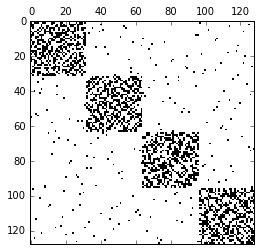

In [11]:
data = scipy.io.loadmat('network1.mat')
# G = nx.DiGraph(data['A'])
A = data['A'].astype('float')
plt.spy(A)
comm = data['Comm']

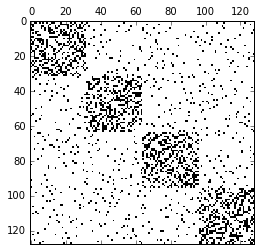

In [9]:
data = scipy.io.loadmat('network2.mat')
# G = nx.DiGraph(data['A'])
A = data['A'].astype('float')
plt.spy(A)
comm = data['Comm']

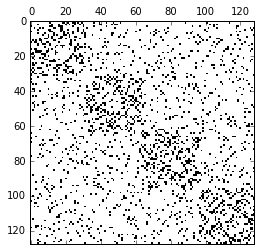

In [10]:
data = scipy.io.loadmat('network3.mat')
# G = nx.DiGraph(data['A'])
A = data['A'].astype('float')
plt.spy(A)
comm = data['Comm']

In [13]:
def MCL(A, tol, p, alpha):
    step = 1
    col_sums = A.sum(axis = 0)
    T = A / col_sums[np.newaxis, :]
    M = T
    while(1):
        print('step', step)
        step += 1
        # Expancion step:
        M1 = np.linalg.matrix_power(M, p)
        # Inflation step:
        M1 = np.power(M1, alpha)
        col_sums = M1.sum(axis = 0)
        M1 = M1 / col_sums[np.newaxis, :]
        M1[M1<=tol] = 0
        if np.linalg.norm(M - M1) == 0:
            return M1
        else:
            M = M1.copy()

In [14]:
MCL(A, 0.1, 2, 2)

step 1
step 2
step 3


array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])